In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit


data = pd.read_csv('hepatitis.csv')
hepatitis_df = data


In [2]:
hepatitis_df['steroid'].fillna(hepatitis_df['steroid'].mode()[0], inplace = True)
hepatitis_df['fatigue'].fillna(hepatitis_df['fatigue'].mode()[0], inplace = True)
hepatitis_df['malaise'].fillna(hepatitis_df['malaise'].mode()[0], inplace = True)
hepatitis_df['anorexia'].fillna(hepatitis_df['anorexia'].mode()[0], inplace = True)
hepatitis_df['liver_big'].fillna(hepatitis_df['liver_big'].mode()[0], inplace = True)
hepatitis_df['liver_firm'].fillna(hepatitis_df['liver_firm'].mode()[0], inplace = True)
hepatitis_df['spleen_palpable'].fillna(hepatitis_df['spleen_palpable'].mode()[0], inplace = True)
hepatitis_df['spiders'].fillna(hepatitis_df['spiders'].mode()[0], inplace = True)
hepatitis_df['ascites'].fillna(hepatitis_df['ascites'].mode()[0], inplace = True)
hepatitis_df['varices'].fillna(hepatitis_df['varices'].mode()[0], inplace = True)

hepatitis_df['bilirubin'].fillna(hepatitis_df['bilirubin'].mean(), inplace = True)
hepatitis_df['alk_phosphate'].fillna(hepatitis_df['alk_phosphate'].mean(), inplace = True)
hepatitis_df['sgot'].fillna(hepatitis_df['sgot'].mean(), inplace = True)
hepatitis_df['protime'].fillna(hepatitis_df['protime'].mean(), inplace = True)
hepatitis_df['histology'].fillna(hepatitis_df['histology'].mode()[0], inplace = True)

hepatitis_df['albumin'].fillna(hepatitis_df['albumin'].mean(), inplace = True)

In [3]:
le = preprocessing.LabelEncoder()
hepatitis_df['sex'] = le.fit_transform(hepatitis_df['sex'])
hepatitis_df['steroid'] = le.fit_transform(hepatitis_df['steroid'])
hepatitis_df['antivirals'] = le.fit_transform(hepatitis_df['antivirals'])
hepatitis_df['fatigue'] = le.fit_transform(hepatitis_df['fatigue'])
hepatitis_df['malaise'] = le.fit_transform(hepatitis_df['malaise'])
hepatitis_df['anorexia'] = le.fit_transform(hepatitis_df['anorexia'])
hepatitis_df['liver_big'] = le.fit_transform(hepatitis_df['liver_big'])
hepatitis_df['liver_firm'] = le.fit_transform(hepatitis_df['liver_firm'])
hepatitis_df['spleen_palpable'] = le.fit_transform(hepatitis_df['spleen_palpable'])
hepatitis_df['spiders'] = le.fit_transform(hepatitis_df['spiders'])
hepatitis_df['varices'] = le.fit_transform(hepatitis_df['varices'])
hepatitis_df['ascites'] = le.fit_transform(hepatitis_df['ascites'])
hepatitis_df['histology'] = le.fit_transform(hepatitis_df['histology'])
hepatitis_df['class'] = le.fit_transform(hepatitis_df['class'])

In [4]:
hepatitis_df.corr()['class']
test_data = pd.DataFrame(hepatitis_df['class'])
train_data = hepatitis_df.drop(['class'], axis=1)

hp_xtrain, hp_xtest, hp_ytrain, hp_ytest = train_test_split(train_data, test_data, test_size=0.2,random_state=5)

In [5]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
clf1  = GaussianNB()
clf1.fit(hp_xtrain, hp_ytrain)
y_pred = clf1.predict(hp_xtest)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.6451612903225806
[[ 3  3]
 [ 8 17]]
              precision    recall  f1-score   support

           0       0.27      0.50      0.35         6
           1       0.85      0.68      0.76        25

   micro avg       0.65      0.65      0.65        31
   macro avg       0.56      0.59      0.55        31
weighted avg       0.74      0.65      0.68        31



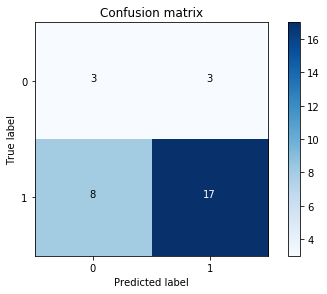

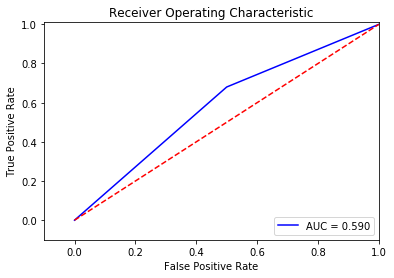

In [7]:
cnf_matrix_tra = confusion_matrix(hp_ytest, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')

plt.show()

fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)

roc_auc = roc_auc_score(hp_ytest, y_pred)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [8]:
clf2  = MultinomialNB()
clf2.fit(hp_xtrain, hp_ytrain)
y_pred = clf2.predict(hp_xtest)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.6774193548387096
[[ 3  3]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.30      0.50      0.37         6
           1       0.86      0.72      0.78        25

   micro avg       0.68      0.68      0.68        31
   macro avg       0.58      0.61      0.58        31
weighted avg       0.75      0.68      0.70        31



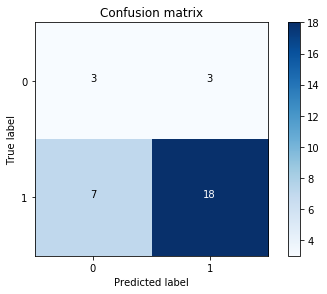

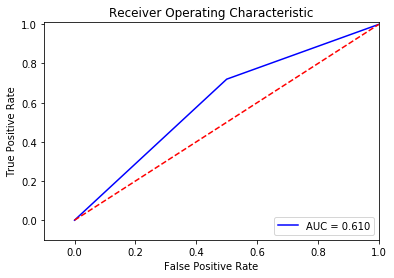

In [9]:
cnf_matrix_tra = confusion_matrix(hp_ytest, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')

plt.show()

fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)

roc_auc = roc_auc_score(hp_ytest, y_pred)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [10]:
alpha= [1,2,3,4,5,6,7,8]
fp = [True, False]
for i in alpha:
    for j in fp:
        clf2  = MultinomialNB(alpha = i , fit_prior = j)
        clf2  = MultinomialNB()
        clf2.fit(hp_xtrain, hp_ytrain)
        y_pred = clf2.predict(hp_xtest)
        print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
        print(confusion_matrix(hp_ytest, y_pred))  
        print(classification_report(hp_ytest, y_pred))

Accuracy: 0.6774193548387096
[[ 3  3]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.30      0.50      0.37         6
           1       0.86      0.72      0.78        25

   micro avg       0.68      0.68      0.68        31
   macro avg       0.58      0.61      0.58        31
weighted avg       0.75      0.68      0.70        31

Accuracy: 0.6774193548387096
[[ 3  3]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.30      0.50      0.37         6
           1       0.86      0.72      0.78        25

   micro avg       0.68      0.68      0.68        31
   macro avg       0.58      0.61      0.58        31
weighted avg       0.75      0.68      0.70        31

Accuracy: 0.6774193548387096
[[ 3  3]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.30      0.50      0.37         6
           1       0.86      0.72      0.78        25

   micro avg       0.68      0.68     

In [11]:
clf3  = ComplementNB()
clf3.fit(hp_xtrain, hp_ytrain)
y_pred = clf3.predict(hp_xtest)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.6774193548387096
[[ 3  3]
 [ 7 18]]
              precision    recall  f1-score   support

           0       0.30      0.50      0.37         6
           1       0.86      0.72      0.78        25

   micro avg       0.68      0.68      0.68        31
   macro avg       0.58      0.61      0.58        31
weighted avg       0.75      0.68      0.70        31



In [12]:
clf4  = BernoulliNB()
clf4.fit(hp_xtrain, hp_ytrain)
y_pred = clf4.predict(hp_xtest)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.7741935483870968
[[ 3  3]
 [ 4 21]]
              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.88      0.84      0.86        25

   micro avg       0.77      0.77      0.77        31
   macro avg       0.65      0.67      0.66        31
weighted avg       0.79      0.77      0.78        31



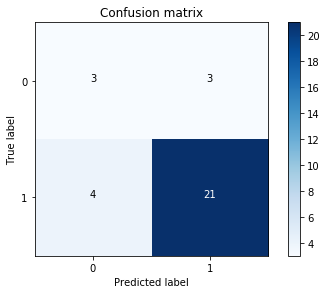

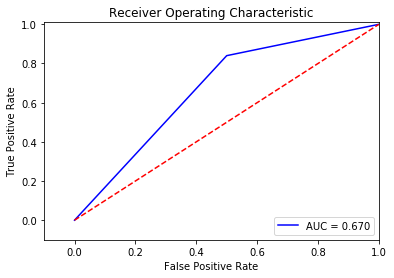

In [13]:
cnf_matrix_tra = confusion_matrix(hp_ytest, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')

plt.show()

fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)

roc_auc = roc_auc_score(hp_ytest, y_pred)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [15]:
alpha= [1,2,3,4,5,6,7,8]
fp = [True, False]
binarize = [1,2,3,4,5,6,7,8]
for i in alpha:
    for j in fp:
        for k in binarize:
            print('BernoulliNB where alpha: ',i, ' , fit_prior: ', j, ' , binarize: ',k )
            clf4  = BernoulliNB(alpha = i,fit_prior = j, binarize= k )
            clf4.fit(hp_xtrain, hp_ytrain)
            y_pred = clf4.predict(hp_xtest)
            print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
            print(confusion_matrix(hp_ytest, y_pred))  
            print(classification_report(hp_ytest, y_pred))
            

BernoulliNB where alpha:  1  , fit_prior:  True  , binarize:  1
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  1  , fit_prior:  True  , binarize:  2
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  1  , fit_prior:  True  , binarize:  3
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
          

Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  3  , fit_prior:  True  , binarize:  3
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  3  , fit_prior:  True  , binarize:  4
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       

[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  4  , fit_prior:  False  , binarize:  6
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  4  , fit_prior:  False  , binarize:  7
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00   

BernoulliNB where alpha:  7  , fit_prior:  True  , binarize:  4
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  7  , fit_prior:  True  , binarize:  5
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  7  , fit_prior:  True  , binarize:  6
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
          

In [16]:
clf4  = BernoulliNB(alpha= 1  , fit_prior= False  , binarize= 2)
clf4.fit(hp_xtrain, hp_ytrain)
y_pred = clf4.predict(hp_xtest)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.8387096774193549
[[ 1  5]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       0.83      1.00      0.91        25

   micro avg       0.84      0.84      0.84        31
   macro avg       0.92      0.58      0.60        31
weighted avg       0.87      0.84      0.79        31



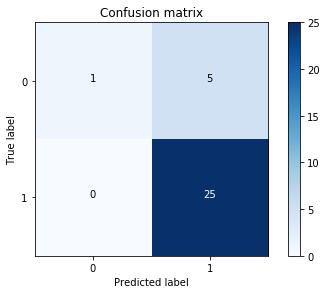

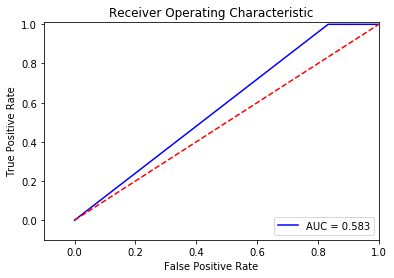

In [18]:
cnf_matrix_tra = confusion_matrix(hp_ytest, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')

plt.show()

fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)

roc_auc = roc_auc_score(hp_ytest, y_pred)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(hp_xtrain)
hp_xtrn=scaler.transform(hp_xtrain)
hp_xtst=scaler.transform(hp_xtest)

In [20]:
clf1  = GaussianNB()
clf1.fit(hp_xtrn, hp_ytrain)
y_pred = clf1.predict(hp_xtst)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.5806451612903226
[[ 4  2]
 [11 14]]
              precision    recall  f1-score   support

           0       0.27      0.67      0.38         6
           1       0.88      0.56      0.68        25

   micro avg       0.58      0.58      0.58        31
   macro avg       0.57      0.61      0.53        31
weighted avg       0.76      0.58      0.62        31



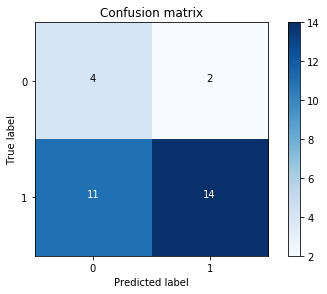

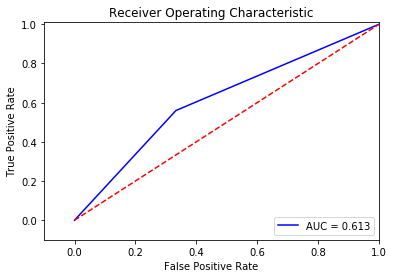

In [21]:
cnf_matrix_tra = confusion_matrix(hp_ytest, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')

plt.show()

fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)

roc_auc = roc_auc_score(hp_ytest, y_pred)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [22]:
clf4  = BernoulliNB()
clf4.fit(hp_xtrn, hp_ytrain)
y_pred = clf4.predict(hp_xtst)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.8387096774193549
[[ 4  2]
 [ 3 22]]
              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.92      0.88      0.90        25

   micro avg       0.84      0.84      0.84        31
   macro avg       0.74      0.77      0.76        31
weighted avg       0.85      0.84      0.84        31



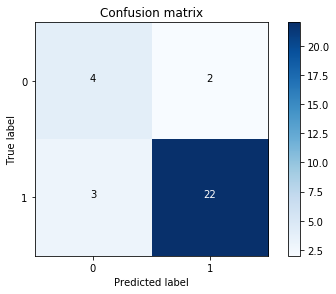

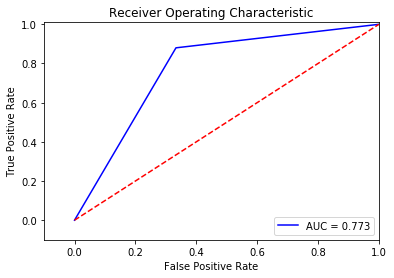

In [23]:
cnf_matrix_tra = confusion_matrix(hp_ytest, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')

plt.show()

fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)

roc_auc = roc_auc_score(hp_ytest, y_pred)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [25]:
alpha= [1,2,3,4,5,6,7,8]
fp = [True, False]
binarize = [1,2,3,4,5,6,7,8]
for i in alpha:
    for j in fp:
        for k in binarize:
            clf4  = BernoulliNB(alpha = i,fit_prior = j, binarize= k )
            clf4.fit(hp_xtrn, hp_ytrain)
            y_pred = clf4.predict(hp_xtst)
            print('BernoulliNB where alpha: ',i, ' , fit_prior: ', j, ' , binarize: ',k )
            print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
            print(confusion_matrix(hp_ytest, y_pred))  
            print(classification_report(hp_ytest, y_pred))
            

BernoulliNB where alpha:  1  , fit_prior:  True  , binarize:  1
Accuracy: 0.7741935483870968
[[ 3  3]
 [ 4 21]]
              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.88      0.84      0.86        25

   micro avg       0.77      0.77      0.77        31
   macro avg       0.65      0.67      0.66        31
weighted avg       0.79      0.77      0.78        31

BernoulliNB where alpha:  1  , fit_prior:  True  , binarize:  2
Accuracy: 0.8387096774193549
[[ 3  3]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.88      0.92      0.90        25

   micro avg       0.84      0.84      0.84        31
   macro avg       0.74      0.71      0.72        31
weighted avg       0.83      0.84      0.83        31

BernoulliNB where alpha:  1  , fit_prior:  True  , binarize:  3
Accuracy: 0.7741935483870968
[[ 0  6]
 [ 1 24]]
          

Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  2  , fit_prior:  False  , binarize:  6
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  2  , fit_prior:  False  , binarize:  7
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0     

BernoulliNB where alpha:  4  , fit_prior:  False  , binarize:  2
Accuracy: 0.8387096774193549
[[ 3  3]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.88      0.92      0.90        25

   micro avg       0.84      0.84      0.84        31
   macro avg       0.74      0.71      0.72        31
weighted avg       0.83      0.84      0.83        31

BernoulliNB where alpha:  4  , fit_prior:  False  , binarize:  3
Accuracy: 0.7741935483870968
[[ 0  6]
 [ 1 24]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.80      0.96      0.87        25

   micro avg       0.77      0.77      0.77        31
   macro avg       0.40      0.48      0.44        31
weighted avg       0.65      0.77      0.70        31

BernoulliNB where alpha:  4  , fit_prior:  False  , binarize:  4
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
       

Accuracy: 0.8387096774193549
[[ 3  3]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.88      0.92      0.90        25

   micro avg       0.84      0.84      0.84        31
   macro avg       0.74      0.71      0.72        31
weighted avg       0.83      0.84      0.83        31

BernoulliNB where alpha:  7  , fit_prior:  False  , binarize:  3
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  7  , fit_prior:  False  , binarize:  4
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0     

In [26]:
clf4  =  BernoulliNB(alpha = 1,fit_prior = False, binarize= 3 )
clf4.fit(hp_xtrn, hp_ytrain)
y_pred = clf4.predict(hp_xtst)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.9032258064516129
[[ 5  1]
 [ 2 23]]
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.96      0.92      0.94        25

   micro avg       0.90      0.90      0.90        31
   macro avg       0.84      0.88      0.85        31
weighted avg       0.91      0.90      0.91        31



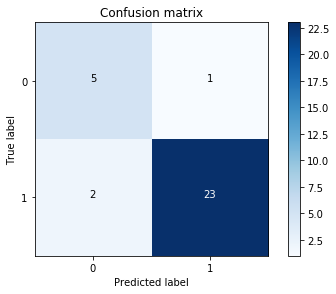

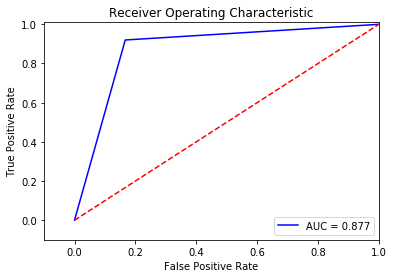

In [27]:
cnf_matrix_tra = confusion_matrix(hp_ytest, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')

plt.show()

fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)

roc_auc = roc_auc_score(hp_ytest, y_pred)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# SMOTE (to handle imbalance data)

In [42]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(hp_ytrain['class']== 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(hp_ytrain['class']== 0)))

sm =SMOTE(random_state = 2)
xtrain_sm, ytrain_sm = sm.fit_sample(hp_xtrain, hp_ytrain)
print('After OverSampling, the shape of train_X: {}'.format(hp_xtrain.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(hp_ytrain.shape))

print("After OverSampling, counts of label '1': {}".format(sum(ytrain_sm==1)))
print("After OverSampling, counts of label '0': {}".format(sum(ytrain_sm==0)))

Before OverSampling, counts of label '1': 98
Before OverSampling, counts of label '0': 26 

After OverSampling, the shape of train_X: (124, 19)
After OverSampling, the shape of train_y: (124, 1) 

After OverSampling, counts of label '1': 98
After OverSampling, counts of label '0': 98


In [43]:
clf1  = GaussianNB()
clf1.fit(xtrain_sm, ytrain_sm)
y_pred = clf1.predict(hp_xtst)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31



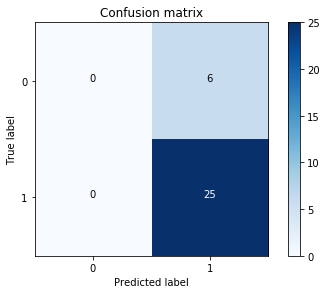

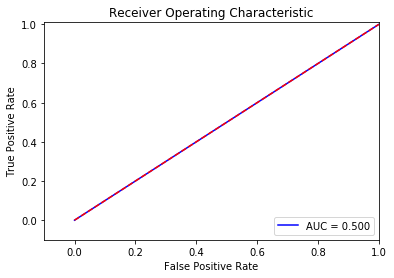

In [44]:
cnf_matrix_tra = confusion_matrix(hp_ytest, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')

plt.show()

fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)

roc_auc = roc_auc_score(hp_ytest, y_pred)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [45]:
clf4  = BernoulliNB()
clf4.fit(xtrain_sm, ytrain_sm)
y_pred = clf4.predict(hp_xtst)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.7741935483870968
[[ 3  3]
 [ 4 21]]
              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.88      0.84      0.86        25

   micro avg       0.77      0.77      0.77        31
   macro avg       0.65      0.67      0.66        31
weighted avg       0.79      0.77      0.78        31



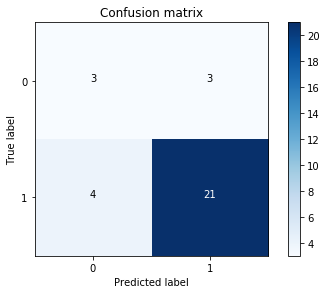

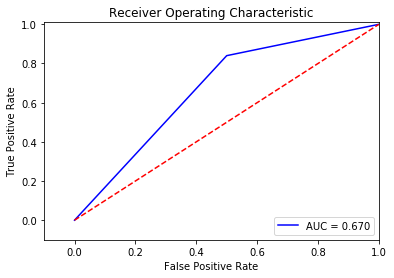

In [46]:
cnf_matrix_tra = confusion_matrix(hp_ytest, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')

plt.show()

fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)

roc_auc = roc_auc_score(hp_ytest, y_pred)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [47]:
alpha= [1,2,3,4,5,6,7,8]
fp = [True, False]
binarize = [1,2,3,4,5,6,7,8]
for i in alpha:
    for j in fp:
        for k in binarize:
            clf4  = BernoulliNB(alpha = i,fit_prior = j, binarize= k )
            clf4.fit(xtrain_sm, ytrain_sm)
            y_pred = clf4.predict(hp_xtst)
            print('BernoulliNB where alpha: ',i, ' , fit_prior: ', j, ' , binarize: ',k )
            print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
            print(confusion_matrix(hp_ytest, y_pred))  
            print(classification_report(hp_ytest, y_pred))
            

BernoulliNB where alpha:  1  , fit_prior:  True  , binarize:  1
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  1  , fit_prior:  True  , binarize:  2
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  1  , fit_prior:  True  , binarize:  3
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
          

BernoulliNB where alpha:  3  , fit_prior:  True  , binarize:  8
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  3  , fit_prior:  False  , binarize:  1
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  3  , fit_prior:  False  , binarize:  2
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
        

[[ 6  0]
 [25  0]]
              precision    recall  f1-score   support

           0       0.19      1.00      0.32         6
           1       0.00      0.00      0.00        25

   micro avg       0.19      0.19      0.19        31
   macro avg       0.10      0.50      0.16        31
weighted avg       0.04      0.19      0.06        31

BernoulliNB where alpha:  5  , fit_prior:  True  , binarize:  5
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  5  , fit_prior:  True  , binarize:  6
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     

BernoulliNB where alpha:  7  , fit_prior:  False  , binarize:  6
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  7  , fit_prior:  False  , binarize:  7
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31

BernoulliNB where alpha:  7  , fit_prior:  False  , binarize:  8
Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
       

In [48]:
clf4  = BernoulliNB( alpha= 1  , fit_prior=True  , binarize= 1)
clf4.fit(xtrain_sm, ytrain_sm)
y_pred = clf4.predict(hp_xtst)
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))

Accuracy: 0.8064516129032258
[[ 0  6]
 [ 0 25]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.81      1.00      0.89        25

   micro avg       0.81      0.81      0.81        31
   macro avg       0.40      0.50      0.45        31
weighted avg       0.65      0.81      0.72        31



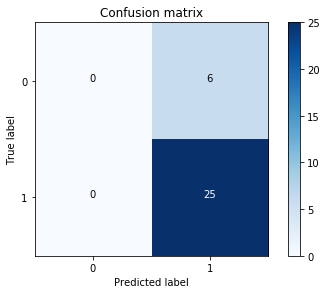

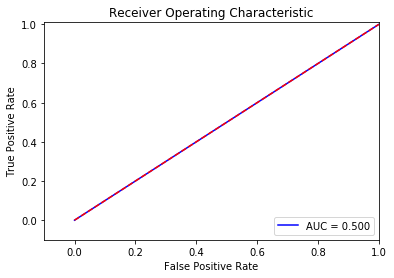

In [49]:
cnf_matrix_tra = confusion_matrix(hp_ytest, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')

plt.show()

fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)

roc_auc = roc_auc_score(hp_ytest, y_pred)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [50]:
classifiers = {'GaussianNB: ':GaussianNB(),'MultinomialNB :':MultinomialNB(), 'ComplementNB:':ComplementNB(), 'BernoulliNB':BernoulliNB(),}

# StratifiedShuffleSplit

In [51]:
log_cols = ["Classifier", "Accuracy","Precision","Recall","ROC Score","F1-Score", "CV_Score"]
log = pd.DataFrame(columns=log_cols)
sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state =5)
sss.get_n_splits(train_data, test_data)
for Name,classify in classifiers.items():
    for train_index, test_index in sss.split(train_data, test_data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = train_data.iloc[train_index], train_data.iloc[test_index]
        y,y_test = test_data.iloc[train_index], test_data.iloc[test_index]
               
        cls = classify
        cls.fit(X, y)
        scores = cross_val_score(cls,X, y, cv=10)
        cv_score = max(scores)
        y_out = cls.predict(X_test)
        accuracy = metrics.accuracy_score(y_test,y_out)
        precision = metrics.precision_score(y_test,y_out,average='weighted')
        recall = metrics.recall_score(y_test,y_out,average='weighted')
        roc_auc = roc_auc_score(y_test,y_out)
        f1_score = metrics.f1_score(y_test,y_out,average='weighted')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,roc_auc,f1_score,cv_score]], columns=log_cols)
        log = log.append(log_entry)

In [52]:
log

,Classifier,Accuracy,Precision,Recall,ROC Score,F1-Score,CV_Score
0,GaussianNB:,0.903226,0.911098,0.903226,0.876667,0.905960,0.923077
0,GaussianNB:,0.838710,0.877322,0.838710,0.836667,0.849691,1.000000
0,GaussianNB:,0.806452,0.903226,0.806452,0.880000,0.825513,0.923077
0,GaussianNB:,0.741935,0.807066,0.741935,0.713333,0.762973,1.000000
0,GaussianNB:,0.806452,0.833100,0.806452,0.753333,0.816244,0.923077
0,MultinomialNB :,0.741935,0.773843,0.741935,0.650000,0.754992,1.000000
0,MultinomialNB :,0.677419,0.749309,0.677419,0.610000,0.703717,1.000000
0,MultinomialNB :,0.838710,0.877322,0.838710,0.836667,0.849691,1.000000
0,MultinomialNB :,0.677419,0.749309,0.677419,0.610000,0.703717,0.846154
0,MultinomialNB :,0.774194,0.819159,0.774194,0.733333,0.789568,0.846154


# ShuffleSplit

In [72]:
ss = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 5)
ss.get_n_splits(train_data, test_data)
log_ss = pd.DataFrame(columns=log_cols)
for Name,classify in classifiers.items():
    for train_index, test_index in ss.split(train_data, test_data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = train_data.iloc[train_index], train_data.iloc[test_index]
        y,y_test = test_data.iloc[train_index], test_data.iloc[test_index]
               
        cls = classify
        cls.fit(X, y)
        scores = cross_val_score(cls,X, y, cv=10)
        cv_score = max(scores)
        y_out = cls.predict(X_test)
        accuracy = metrics.accuracy_score(y_test,y_out)
        precision = metrics.precision_score(y_test,y_out,average='weighted')
        recall = metrics.recall_score(y_test,y_out,average='weighted')
        roc_auc = roc_auc_score(y_test,y_out)
        f1_score = metrics.f1_score(y_test,y_out,average='weighted')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,roc_auc,f1_score,cv_score]], columns=log_cols)
        log_ss = log_ss.append(log_entry)

In [73]:
log_ss

,Classifier,Accuracy,Precision,Recall,ROC Score,F1-Score,CV_Score
0,GaussianNB:,0.645161,0.738270,0.645161,0.590000,0.677630,0.846154
0,GaussianNB:,0.903226,0.932258,0.903226,0.937500,0.908539,0.923077
0,GaussianNB:,0.774194,0.874389,0.774194,0.763889,0.806097,0.923077
0,GaussianNB:,0.838710,0.848001,0.838710,0.794643,0.842370,1.000000
0,GaussianNB:,0.774194,0.888149,0.774194,0.726190,0.814444,0.916667
0,MultinomialNB :,0.677419,0.749309,0.677419,0.610000,0.703717,0.846154
0,MultinomialNB :,0.870968,0.917889,0.870968,0.916667,0.879440,1.000000
0,MultinomialNB :,0.774194,0.835253,0.774194,0.657407,0.798344,0.909091
0,MultinomialNB :,0.677419,0.677419,0.677419,0.538690,0.677419,0.923077
0,MultinomialNB :,0.870968,0.944700,0.870968,0.928571,0.891811,0.846154


# KFold

In [80]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5 , shuffle = True ,random_state = 20)
kfold.get_n_splits(train_data, test_data)
log_kf = pd.DataFrame(columns=log_cols)
for Name,classify in classifiers.items():
    for train_index, test_index in kfold.split(train_data, test_data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = train_data.iloc[train_index], train_data.iloc[test_index]
        y,y_test = test_data.iloc[train_index], test_data.iloc[test_index]
               
        cls = classify
        cls.fit(X, y)
        scores = cross_val_score(cls,X, y, cv=10)
        cv_score = max(scores)
        y_out = cls.predict(X_test)
        accuracy = metrics.accuracy_score(y_test,y_out)
        precision = metrics.precision_score(y_test,y_out,average='weighted')
        recall = metrics.recall_score(y_test,y_out,average='weighted')
        roc_auc = roc_auc_score(y_test,y_out)
        f1_score = metrics.f1_score(y_test,y_out,average='weighted')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,roc_auc,f1_score,cv_score]], columns=log_cols)
        log_kf = log_kf.append(log_entry)

In [81]:
log_kf

,Classifier,Accuracy,Precision,Recall,ROC Score,F1-Score,CV_Score
0,GaussianNB:,0.774194,0.808504,0.774194,0.766304,0.784143,0.923077
0,GaussianNB:,0.645161,0.790747,0.645161,0.626923,0.690618,0.923077
0,GaussianNB:,0.645161,0.795202,0.645161,0.720109,0.665876,1.000000
0,GaussianNB:,0.838710,0.882889,0.838710,0.823077,0.852383,0.923077
0,GaussianNB:,0.838710,0.849846,0.838710,0.773333,0.843267,0.923077
0,MultinomialNB :,0.677419,0.805376,0.677419,0.741848,0.697227,0.916667
0,MultinomialNB :,0.774194,0.754779,0.774194,0.542308,0.763779,0.846154
0,MultinomialNB :,0.741935,0.741935,0.741935,0.663043,0.741935,0.916667
0,MultinomialNB :,0.838710,0.919355,0.838710,0.903846,0.857012,0.923077
0,MultinomialNB :,0.677419,0.677419,0.677419,0.483333,0.677419,1.000000
